In [11]:
import vtk
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = bytes(memoryview(writer.GetResult()))
    
    return Image(data)

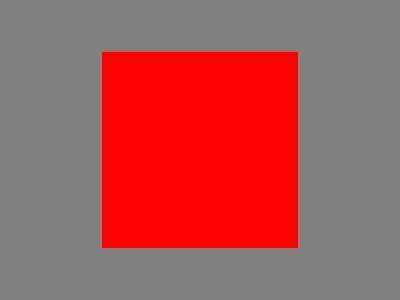

In [12]:
cube = vtk.vtkCubeSource()
cubeMapper = vtk.vtkPolyDataMapper()
cubeMapper.SetInputConnection(cube.GetOutputPort())
cubeActor = vtk.vtkActor()
cubeActor.SetMapper(cubeMapper)
cubeActor.GetProperty().SetColor(1, 0, 0)


renderer = vtk.vtkRenderer()
renderer.SetBackground(0.5, 0.5, 0.5)
renderer.AddActor(cubeActor)

vtk_show(renderer, width=400, height=300)

# renderWindow = vtk.vtkRenderWindow()
# renderWindow.SetSize(500, 500)
# renderWindow.AddRenderer(renderer)
# renderWindow.Render()

# iren = vtk.vtkRenderWindowInteractor()
# iren.SetRenderWindow(renderWindow)